Question: Consider the following set of training examples: What is the information gain of a2 relative to these training examples? Provide the equation for calculating the information gain as well as the intermediate results. 

In [1]:
# import required modules 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
Instance= [1,2,3,4,5,6]
Classification =['+','+','-','+','-','-']
a1= ['T','T','T','F','F','F']
a2= ['T','T','F','F','T','T']

In [3]:
#create the dictionary with the of list
dic={"Instance":Instance,"Classification":Classification,"a1":a1,"a2":a2}

In [4]:
#To convert these dic to dataframe
df=pd.DataFrame(dic)

In [5]:
df

,Instance,Classification,a1,a2
0,1,+,T,T
1,2,+,T,T
2,3,-,T,F
3,4,+,F,F
4,5,-,F,T
5,6,-,F,T


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Instance        6 non-null      int64 
 1   Classification  6 non-null      object
 2   a1              6 non-null      object
 3   a2              6 non-null      object
dtypes: int64(1), object(3)
memory usage: 320.0+ bytes


In [7]:
df.insert(0, 'ID', range(1, 1 + len(df)))
df.set_index("ID",inplace=True)

In [8]:
df_num=df.select_dtypes(["int64"])

In [9]:
df_num

,Instance
ID,
1,1
2,2
3,3
4,4
5,5
6,6


In [10]:
df_cat=df.select_dtypes(["object"])

In [11]:
df_cat

,Classification,a1,a2
ID,,,
1,+,T,T
2,+,T,T
3,-,T,F
4,+,F,F
5,-,F,T
6,-,F,T


In [12]:
from sklearn.preprocessing import LabelEncoder 

In [13]:
le=LabelEncoder()
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col])

In [14]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1 to 6
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Classification  6 non-null      int32
 1   a1              6 non-null      int32
 2   a2              6 non-null      int32
dtypes: int32(3)
memory usage: 120.0 bytes


In [15]:
# final df which is ready for ML algorithm we will create 
df_new=pd.merge(df_num,df_cat,on="ID")

In [16]:
df_new

,Instance,Classification,a1,a2
ID,,,,
1,1,0,1,1
2,2,0,1,1
3,3,1,1,0
4,4,0,0,0
5,5,1,0,1
6,6,1,0,1


In [17]:
feature=df_new.drop("a2",axis=1)

In [18]:
feature

,Instance,Classification,a1
ID,,,
1,1,0,1
2,2,0,1
3,3,1,1
4,4,0,0
5,5,1,0
6,6,1,0


In [19]:
target=df_new["a2"]

In [20]:
target

ID
1    1
2    1
3    0
4    0
5    1
6    1
Name: a2, dtype: int32

In [21]:
dt=DecisionTreeClassifier() # criterion='gini' default 

In [22]:
dt.fit(feature,target)

DecisionTreeClassifier()

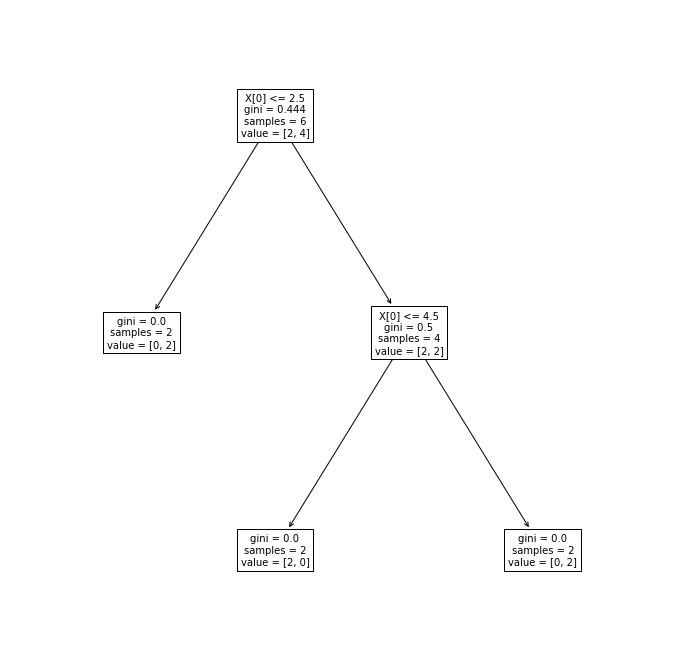

In [23]:
fig,ax=plt.subplots(figsize=(12,12))
tree.plot_tree(dt.fit(feature,target),fontsize=10)
plt.savefig("tree_a2",dpi=100) # dot per inch